#Sentiment Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

#Natural Language Processing

1. nltk – Natural Language Toolkit is a collection of libraries for natural language processing

2. stopwords – a collection of words that don’t provide any meaning to a sentence

3. WordNetLemmatizer – used to convert different forms of words into a single item but still keeping the context intact

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#Scikit-Learn (Machine Learning Library for Python)

1. CountVectorizer – transform text to vectors

2. GridSearchCV – for hyperparameter tuning

3. RandomForestClassifier – machine learning algorithm for classification

In [8]:
pip install scikit-plot

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from scikitplot.metrics import plot_confusion_matrix

#Load the dataset

In [11]:
df_train = pd.read_csv("/content/train.txt",delimiter=';',names=['text','label'])
df_val = pd.read_csv("/content/val.txt",delimiter=';',names=['text','label'])

Now, we will concatenate these two data frames, as we will be using cross-validation and we have a separate test dataset, so we don’t need a separate validation set of data. And, then we will reset the index to avoid duplicate indexes.

In [12]:
df = pd.concat([df_train,df_val])
df.reset_index(inplace=True,drop=True)

In [15]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [13]:
print("Shape of the DataFrame:",df.shape)


Shape of the DataFrame: (18000, 2)


In [14]:
print(df.sample(5))

                                                    text    label
17365  i am feeling pretty confident that on monday i...      joy
3988   i feel instantly glamorous just pulling it out...      joy
2531   i look around at the people around me and i fe...    anger
14607  i am seeing neurosurgeons document conversatio...     fear
2244                           i like feeling devastated  sadness


Now, we will check for the various target labels in our dataset using seaborn.

<Axes: xlabel='label', ylabel='count'>

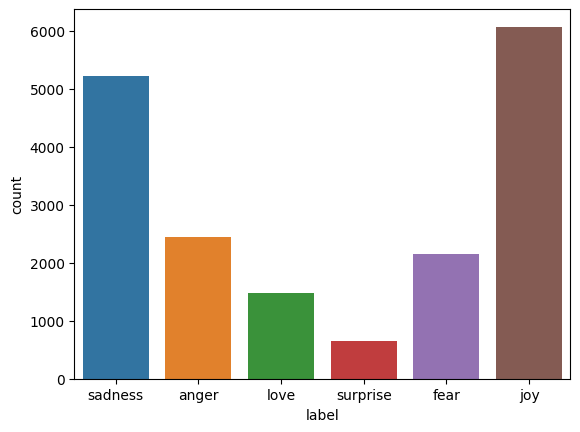

In [17]:
sns.countplot(df,x='label')

As we can see that, we have 6 labels or targets in the dataset. We can make a multi-class classifier for Sentiment Analysis. But, for the sake of simplicity, we will merge these labels into two classes, i.e. Positive and Negative sentiment.

In [21]:
def custom_encoder(df):#1 --> Positive,2 --> Negative
    df.replace(to_replace ="surprise", value =1, inplace=True)
    df.replace(to_replace ="love", value =1, inplace=True)
    df.replace(to_replace ="joy", value =1, inplace=True)
    df.replace(to_replace ="fear", value =0, inplace=True)
    df.replace(to_replace ="anger", value =0, inplace=True)
    df.replace(to_replace ="sadness", value =0, inplace=True)
custom_encoder(df['label'])

In [22]:
df

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,1
4,i am feeling grouchy,0
...,...,...
17995,im having ssa examination tomorrow in the morn...,0
17996,i constantly worry about their fight against n...,1
17997,i feel its important to share this info for th...,1
17998,i truly feel that if you are passionate enough...,1


<Axes: xlabel='label', ylabel='count'>

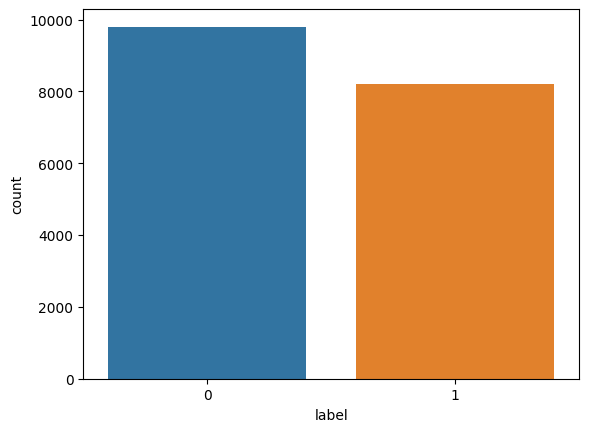

In [20]:
sns.countplot(df,x='label')

Now, we can see that our target has changed to 0 and 1,i.e. 0 for Negative and 1 for Positive, and the data is more or less in a balanced state.

#Data Pre-processing

Now, we will perform some pre-processing on the data before converting it into vectors and passing it to the machine learning model.

We will create a function for pre-processing of data.

1. First, we will iterate through each record, and using a regular expression, we will get rid of any characters apart from alphabets.

2. Then, we will convert the string to lowercase as, the word “Good” is different from the word “good”.

Because, without converting to lowercase, it will cause an issue when we will create vectors of these words, as two different vectors will be created for the same word which we don’t want to.

3. Then we will check for stopwords in the data and get rid of them. Stopwords are commonly used words in a sentence such as “the”, “an”, “to” etc. which do not add much value.

4. Then, we will perform lemmatization on each word,i.e. change the different forms of a word into a single item called a lemma.

A lemma is a base form of a word. For example, “run”, “running” and “runs” are all forms of the same lexeme, where the “run” is the lemma. Hence, we are converting all occurrences of the same lexeme to their respective lemma.

5. And, then return a corpus of processed data.

But first, we will create an object of WordNetLemmatizer and then we will perform the transformation.

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [23]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [28]:
corpus = text_transformation(df['text'])


Now, we will create a Word Cloud. It is a data visualization technique used to depict text in such a way that, the more frequent words appear enlarged as compared to less frequent words. This gives us a little insight into, how the data looks after being processed through all the steps until now.

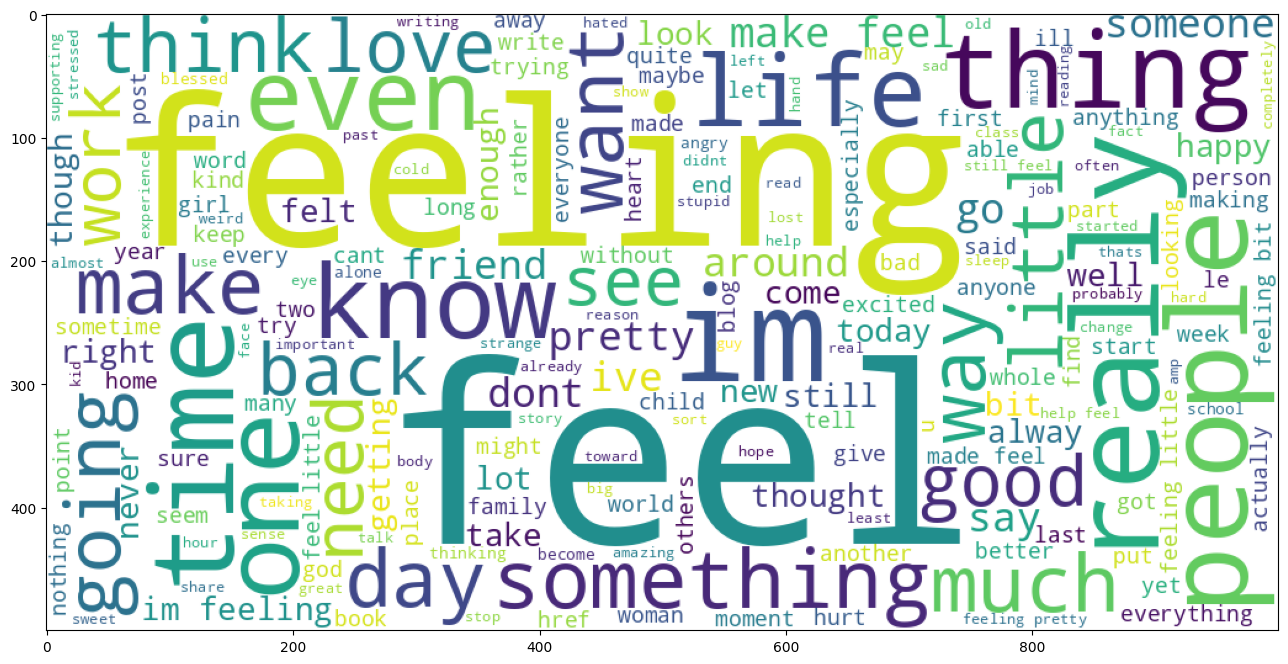

In [31]:
plt.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

#Bag of Words
Now, we will use the Bag of Words Model(BOW), which is used to represent the text in the form of a bag of words,i.e. the grammar and the order of words in a sentence are not given any importance, instead, multiplicity,i.e. (the number of times a word occurs in a document) is the main point of concern.

Basically, it describes the total occurrence of words within a document.

In [32]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.label

We will take ngram_range as (1,2) which signifies a bigram.

Ngram is a sequence of ‘n’ of words in a row or sentence. ‘ngram_range’ is a parameter, which we use to give importance to the combination of words, such as, “social media” has a different meaning than “social” and “media” separately.



#model training

In [42]:
hyperparameters = {
    'max_features': 'auto',
    'n_estimators':500,
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'bootstrap': True
}

# Create the RandomForestClassifier with the specified hyperparameters
model = RandomForestClassifier(**hyperparameters)

In [43]:
# Train the model on the training data
model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_samples_split=5,
                       n_estimators=500)

#Test Data Transformation

Now, we will read the test data and perform the same transformations we did on training data and finally evaluate the model on its predictions.

In [44]:
test_df = pd.read_csv('/content/test.txt',delimiter=';',names=['text','label'])
X_test,y_test = test_df.text,test_df.label
#encode the labels into two classes , 0 and 1
test_df = custom_encoder(y_test)
#pre-processing of text
test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = model.predict(testdata)

#Model Evaluation

We will evaluate our model using various metrics such as Accuracy Score, Precision Score, Recall Score, Confusion Matrix and create a roc curve to visualize how our model performed.

Accuracy_score:  0.9625
Precision_score:  0.9617486338797814
Recall_score:  0.9565217391304348
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1080
           1       0.96      0.96      0.96       920

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



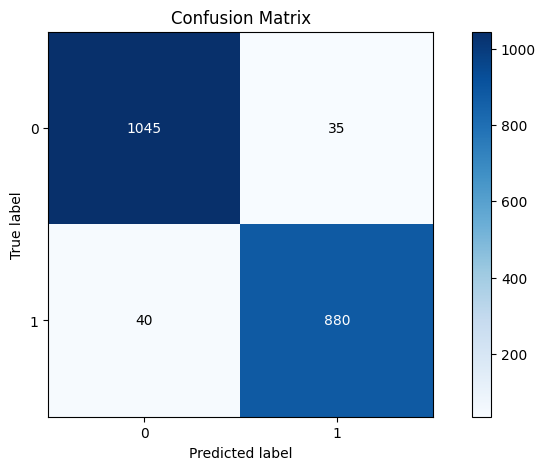

In [45]:
plt.rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)

#Predict for Custom Input:

In [46]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")

In [54]:
# function to take the input statement and perform the same transformations we did earlier
def sentiment_predictor(input):
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = model.predict(transformed_input)
    expression_check(prediction)

In [48]:
input1 = ["Sometimes I just want to punch someone in the face."]
input2 = ["I bought a new phone and it's so good."]

In [55]:
sentiment_predictor(input1)
sentiment_predictor(input2)

Input statement has Negative Sentiment.
Input statement has Positive Sentiment.


As we can see that our model accurately classified the sentiments behind the two sentences.